# Object Detection in Image

In [1]:
# importing modules

import cv2
import numpy as np

In [2]:
# Loading weights and cfg files

net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []

In [3]:
with open("classes.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [4]:
# Loading image for object detection

img = cv2.imread("image.jpeg")
img = cv2.resize(img, None, fx=1, fy=0.8)
height, width, channels = img.shape

In [5]:
# Detecting objects

blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [6]:
# Showing informations on the screen

class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [7]:
found={}
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.3)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
        if label in found:
            found[label]+=1
        else:
            found[label]=1

In [8]:
# showing the result

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
print(f'Objects detected are :')
for i in found:
    print(i,':',found[i])

Objects detected are :
car : 3
person : 5


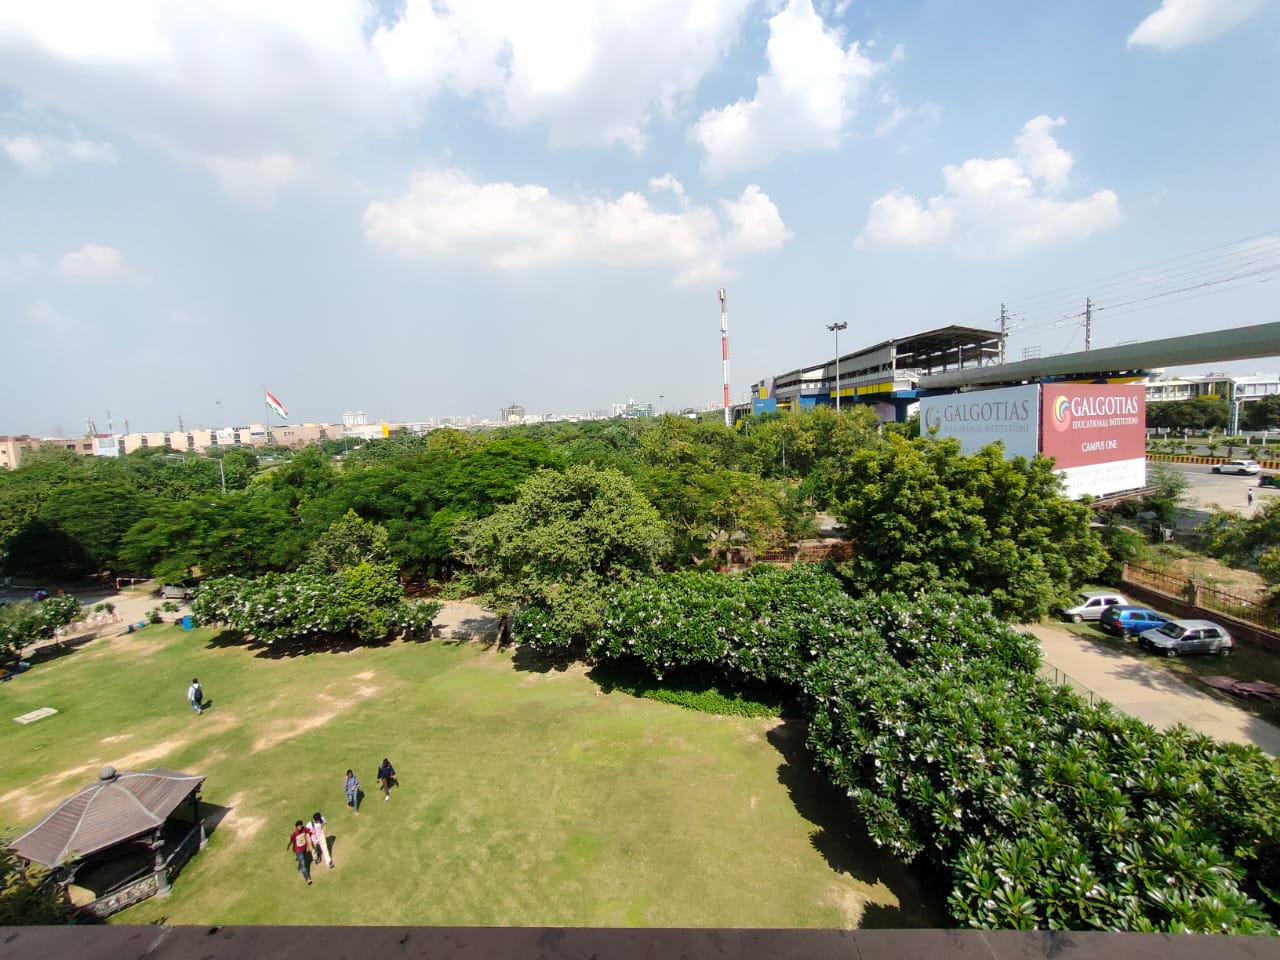

In [10]:
#input image

from IPython.display import Image
url = 'image.jpeg'
Image(url,width=900, height=10)

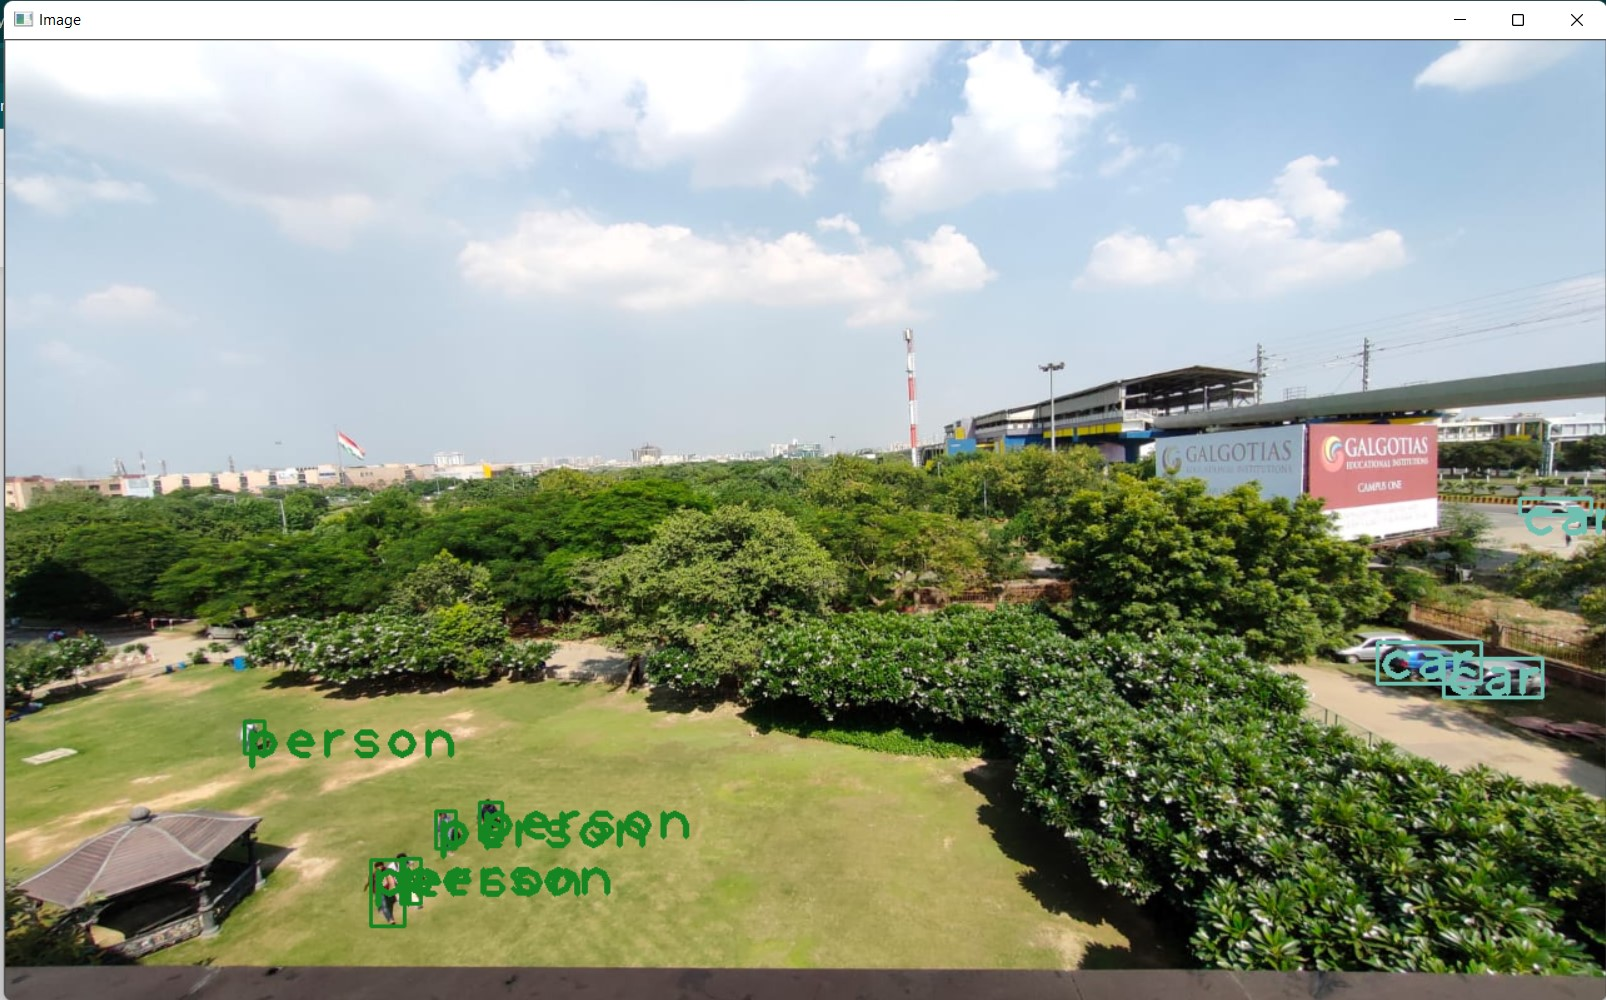

In [11]:
# Output image

from IPython.display import Image
url = 'output.jpg'
Image(url,width=900, height=10)

In [12]:
print(f'Objects detected are :')
for i in found:
    print(i,':',found[i])

Objects detected are :
car : 3
person : 5
